<a href="https://colab.research.google.com/github/ChrisLowry3/Data110/blob/main/Final_Project_Chris_Lowry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import kagglehub

# Download latest version
path = kagglehub.dataset_download("seanlahman/the-history-of-baseball")

print("Path to dataset files:", path)

100%|██████████| 20.5M/20.5M [00:00<00:00, 24.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/seanlahman/the-history-of-baseball/versions/2


In [2]:
df=pd.read_csv(path+"/batting.csv")
df.head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


#Visualization 1
This chart is to see if we can find a trend in how many homeruns are being hit across the league each year and if that trend is increasing or decreasing. We will be able to see if homeruns are becoming a more popular stat or is it a thing of the past.
From the chart we can see the homerun total is however increasing as time goes. There are a few outlier years where it takes a huge drop off, but that can be from outside factors not available from the data set, so overall it has increased signifigantly through time.

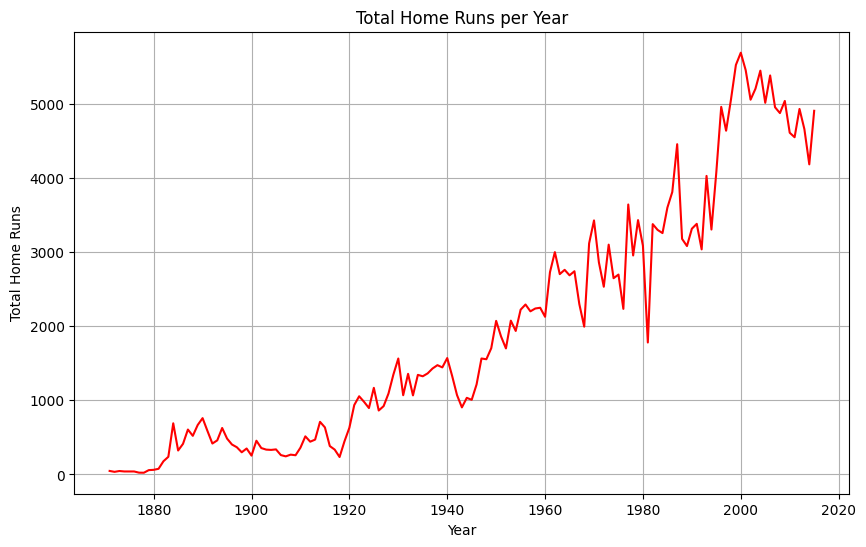

In [3]:
hr_per_year = df.groupby('year')['hr'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hr_per_year, x='year', y='hr', color='red')
plt.title("Total Home Runs per Year")
plt.xlabel("Year")
plt.ylabel("Total Home Runs")
plt.grid(True)
plt.show()

#Visualization 2
Adding on to the line chart we just created on homeruns per year, in this chart we look to see if we can find a small reason as to why there is a uptrend in the homerun total, one huge factor being, how many players are there each year in the league and does it correlate. As we can see in this chart, the total number of players just about increases at the same path as the total number of homeruns. We can make an hypothesis from this that homerun total only increases so steeply because of the growing number of players in the sport.

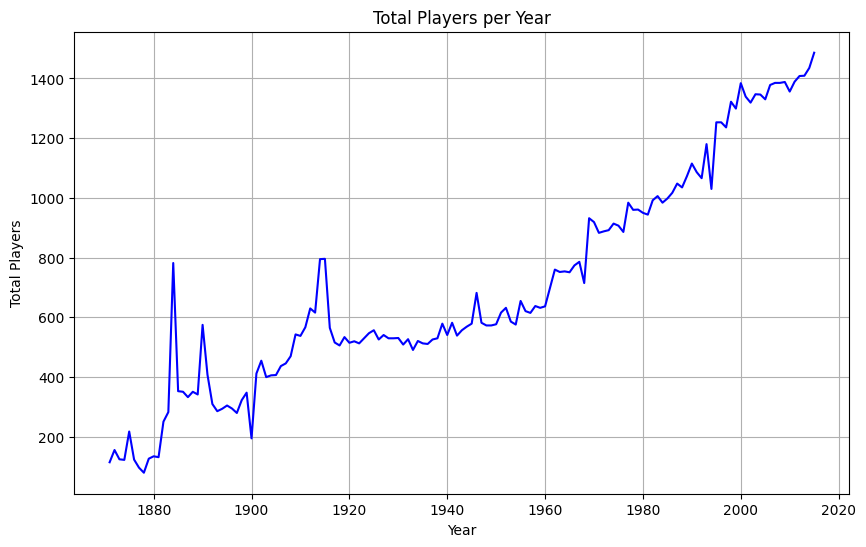

In [4]:
total_players_per_year = df.groupby('year')['player_id'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=total_players_per_year, x='year', y='player_id', color='blue')
plt.title("Total Players per Year")
plt.xlabel("Year")
plt.ylabel("Total Players")
plt.grid(True)
plt.show()

Finding batting average Stats by dividing hits by ab's.

In [5]:
df['batting_average'] = df['h'] / df['ab']
print(df.head())

batting_average_by_player = df.groupby('player_id')['batting_average'].mean()

print(batting_average_by_player.head())

   player_id  year  stint team_id league_id   g     ab     r     h  double  \
0  abercda01  1871      1     TRO       NaN   1    4.0   0.0   0.0     0.0   
1   addybo01  1871      1     RC1       NaN  25  118.0  30.0  32.0     6.0   
2  allisar01  1871      1     CL1       NaN  29  137.0  28.0  40.0     4.0   
3  allisdo01  1871      1     WS3       NaN  27  133.0  28.0  44.0    10.0   
4  ansonca01  1871      1     RC1       NaN  25  120.0  29.0  39.0    11.0   

   ...   sb   cs   bb   so  ibb  hbp  sh  sf  g_idp  batting_average  
0  ...  0.0  0.0  0.0  0.0  NaN  NaN NaN NaN    NaN         0.000000  
1  ...  8.0  1.0  4.0  0.0  NaN  NaN NaN NaN    NaN         0.271186  
2  ...  3.0  1.0  2.0  5.0  NaN  NaN NaN NaN    NaN         0.291971  
3  ...  1.0  1.0  0.0  2.0  NaN  NaN NaN NaN    NaN         0.330827  
4  ...  6.0  2.0  2.0  1.0  NaN  NaN NaN NaN    NaN         0.325000  

[5 rows x 23 columns]
player_id
aardsda01    0.000000
aaronha01    0.301075
aaronto01    0.220660
aasedo

#Visualization 3
Unlike the homerun chart, this line graph as the opposite trend. The average batting average across the players each year is descending. In some years it does jump back up a bit, but the main trend is it is getting lower and lower each decade. You can put this information on a ton of factors, some like how we have transitioned in the baseball world to trying to hit homeruns because it boosts views and is the most exciting thing, or we can say because the sample size is getting larger every view years the percentage is going further and further down.

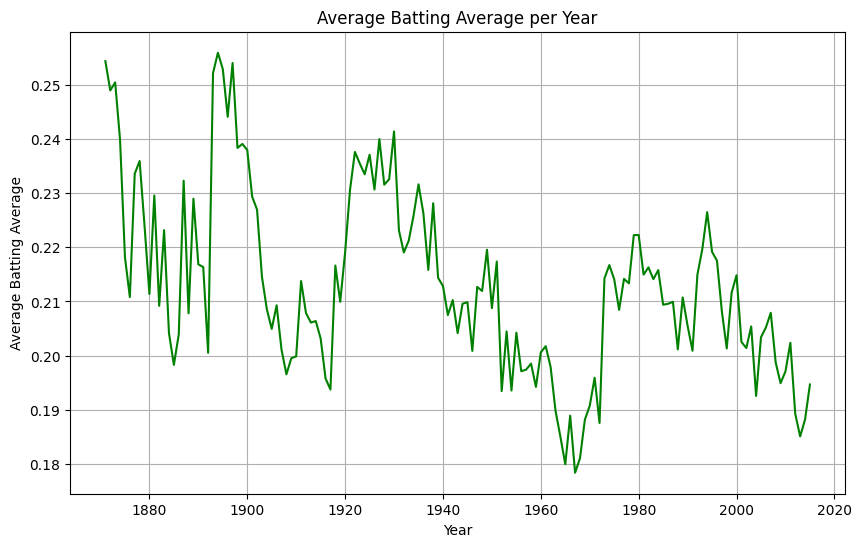

In [6]:
average_batting_average_by_year = df.groupby('year')['batting_average'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=average_batting_average_by_year, x='year', y='batting_average', color='green')
plt.title("Average Batting Average per Year")
plt.xlabel("Year")
plt.ylabel("Average Batting Average")
plt.grid(True)
plt.show()

#Visualization 4
This visual is a heatmap comparing stats and seeing their correlation. Which stats go up with each other, which go down and which goes seperate ways. Veiwing this chart, we can see certain things and things that stumble myself. The obvious ones are games are very closely related to most stats. This is because the more games played the more you can get more stats. Same with at-bats and hits or rbi's. The more at bats you take the better chance of getting a hit or rbi or even a strike out. Something that makes a lot of sense is stolen bases being not correlated almost at all to home runs. This is because to steal a base you have to hit a single, double, and maybe a triple and stay on the base. But in a homerun you don't stay on the base, so you can't steal the next one. The only thing I don't see clearly is how strike outs are almost fully correlating with other stats because if you strike out you can't get a hit or a homerun, however, maybe it is because since you get a few at bats per game, if you strike out once, you might be more motivated to get a hit after to up your average, that is just my theory on how they correlate.

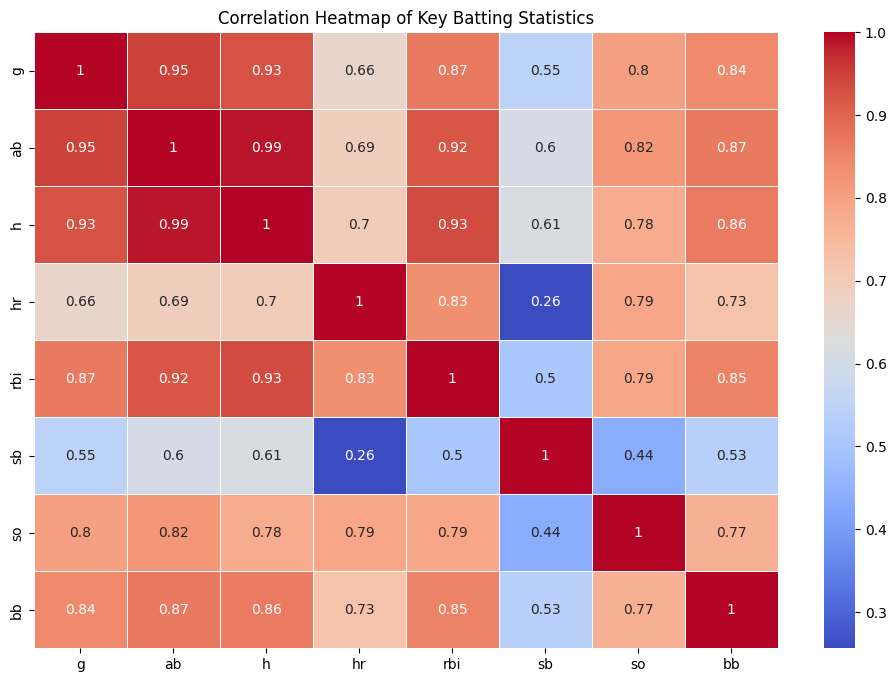

In [22]:
batting_stats = df[['g', 'ab', 'h', 'hr', 'rbi', 'sb', 'so', 'bb']]
corr_matrix = batting_stats.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Key Batting Statistics")
plt.show()

#Visualization 5
This chart is a scatter plot on the highest homerun total by a player in each year. This is to see if there is a trend on if as homeruns are going up, is the highest number by a player going up or is it actually just because there are more players in the league. As we can see from the chart, some of the totals have actually trended upwards, but have mostly stayed constant. This can help us see that players maybe aren't hitting more homeruns individually, but in fact there are just more players in the league making the totals go up.

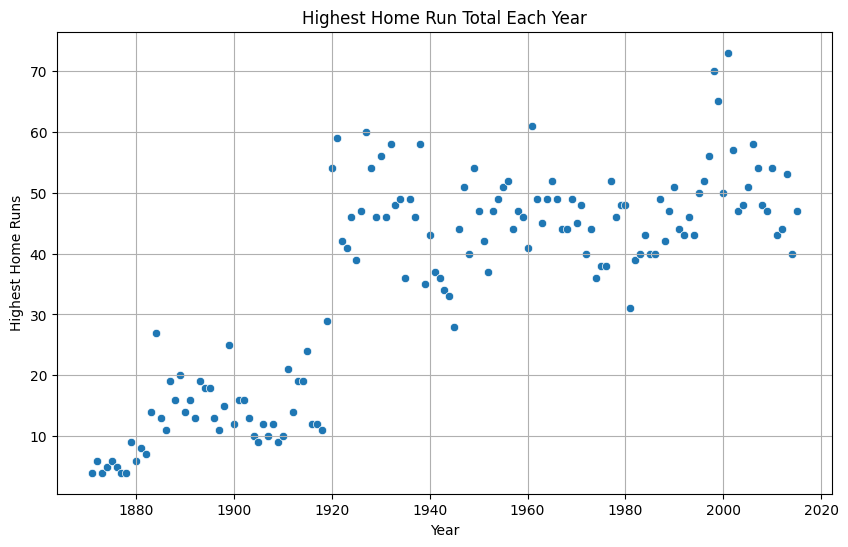

In [31]:
highest_hr_per_year = df.groupby('year')['hr'].max().reset_index()

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=highest_hr_per_year, x='year', y='hr')
plt.title('Highest Home Run Total by a Player Each Year')
plt.xlabel('Year')
plt.ylabel('Highest Home Runs')
plt.grid(True)
plt.show()